In [145]:
#Part 1 of assignment: Modify the binary logistic regression classifier with iris Dataset, with our 2D dataset, preform max min normalization instead of z normalization

In [146]:
#First lets get all the code from the IRIS dataset file

import os

import tensorflow.python.framework.random_seed

print(os.getcwd())
# Upload the data file in that folder
# - It will be deleted after your session
#% matplotlib inline
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

#Read the data from CSV to pandas DATAFRAME: Changing the called CSV file to the x2d CSV file
iris = pd.read_csv('x2d.csv',header=None)
iris.columns = ["ID","Var1","Var2","Label"]
iris.shape
iris.head()

C:\Users\chees\Desktop\USU\Semester Spring 2023\Special Topics_Deep Learning\DeepLearning_Larsen\DNN_Class_Spring_2023\Homework_2


,ID,Var1,Var2,Label
0,0,5.1,3.5,1
1,1,4.9,3.0,1
2,2,4.7,3.2,1
3,3,4.6,3.1,1
4,4,5.0,3.6,1


In [147]:
#Features: Getting the first Onehundred features
iris = iris[:100]

In [148]:
#Covert the string lables to numerals: This section is unrequired for our dataset since they are already numbers

#iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])

X shape:  (100, 2) y shape:  (100,)
Number of total examples:  100  Number of features:  2


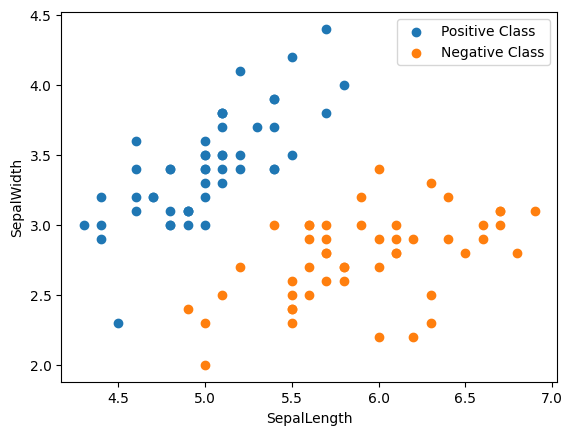

In [149]:
#Visualize two class examples in 2D space
plt.scatter(iris[:50].Var1, iris[:50].Var2, label='Positive Class')
plt.scatter(iris[51:].Var1, iris[51:].Var2, label='Negative Class')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')
#Define X and y
X = iris.drop(labels=['ID', 'Label'], axis=1).values
y = iris.Label.values
print("X shape: ", X.shape, "y shape: ", y.shape)
(m, n) = X.shape
print("Number of total examples: ", m, " Number of features: ", n)


In [150]:
#Split data
# Train: test(70 %:30 %)
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)
train_index = np.random.choice(len(X), round(len(X) * 0.7), replace=False)
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

In [151]:
#Normalize

#- Z normalization
# normalization: feature_value - mean(feature) / standard_deviation(feature)
def z_normalization(feat_val):
    feat_mean = np.mean(feat_val, axis=0)
    feat_sd = np.std(feat_val, axis=0)
    return np.divide(feat_val - feat_mean, feat_sd)

# Max-min normalization
# normalization: feature_value - min(feature) / max(feature) - min(feature)
def max_min_normalization(feat_val):
    feat_max = np.max(feat_val,axis=0)
    feat_min = np.min(feat_val,axis=0)
    return np.divide(feat_val-feat_min,feat_max-feat_min)

# z normalize
X_train = max_min_normalization(X_train)
X_test = max_min_normalization(X_test)

In [152]:
#Weight and bias initialization
W = tf.Variable(tf.random.normal(shape=[n, 1]))
b = tf.Variable(tf.random.normal(shape=[1, 1]))
init = tf.global_variables_initializer()

In [153]:
#Defining the placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, n])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [154]:
#Model definition
mod = tf.matmul(data, W) + b

In [155]:
#Define loss function
#first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [156]:
#Initialize hyperparameters
# - Batchsize
# - Learningrate
# - Number of iterations
learning_rate = 0.01
batch_size = 20
iter_num = 500

In [157]:
#Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [158]:
#Define the goal
# - minimize the defined loss
goal = opt.minimize(loss)

In [159]:
#Define accuracy
# The default threshold of sigmoid is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [160]:
# Initialize variables that analyze learning progress
loss_trace = []
train_acc = []
test_acc = []

In [161]:
#Training
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_X_train = X_train[batch_index]
    batch_y_train = np.matrix(y_train[batch_index]).T
    sess.run(goal, feed_dict={data: batch_X_train, target: batch_y_train})
    temp_loss = sess.run(loss, feed_dict={data: batch_X_train, target: batch_y_train})
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    if (epoch + 1) % 10 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss, temp_train_acc,
                                                                                 temp_test_acc))

epoch:   10 loss: 0.943970 train_acc: 0.528571 test_acc: 0.433333
epoch:   20 loss: 0.865952 train_acc: 0.528571 test_acc: 0.433333
epoch:   30 loss: 0.862149 train_acc: 0.528571 test_acc: 0.433333
epoch:   40 loss: 0.795523 train_acc: 0.528571 test_acc: 0.433333
epoch:   50 loss: 0.840587 train_acc: 0.528571 test_acc: 0.433333
epoch:   60 loss: 0.989822 train_acc: 0.528571 test_acc: 0.433333
epoch:   70 loss: 0.767052 train_acc: 0.528571 test_acc: 0.433333
epoch:   80 loss: 0.811187 train_acc: 0.528571 test_acc: 0.433333
epoch:   90 loss: 0.901762 train_acc: 0.528571 test_acc: 0.433333
epoch:  100 loss: 0.796920 train_acc: 0.528571 test_acc: 0.433333
epoch:  110 loss: 0.555933 train_acc: 0.528571 test_acc: 0.433333
epoch:  120 loss: 0.511796 train_acc: 0.528571 test_acc: 0.433333
epoch:  130 loss: 0.859628 train_acc: 0.528571 test_acc: 0.433333
epoch:  140 loss: 0.721149 train_acc: 0.528571 test_acc: 0.433333
epoch:  150 loss: 0.757182 train_acc: 0.528571 test_acc: 0.433333
epoch:  16

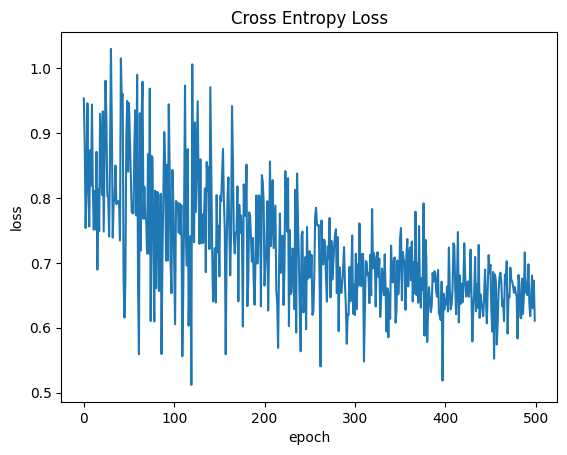

In [162]:
#Visualization of the loss function

plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

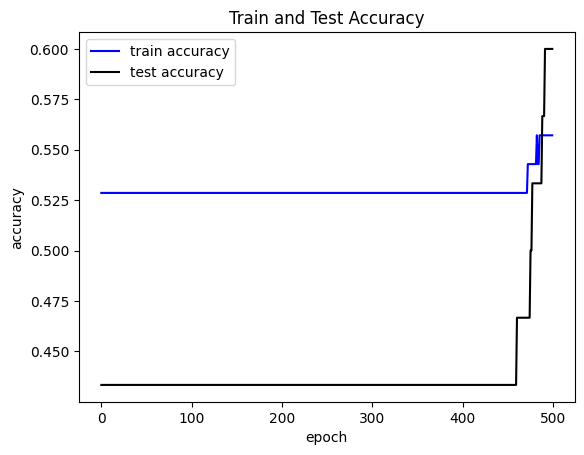

In [163]:
#Train and test accuracy visualization

plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()